# Average Annual Temperature
***
### Seattle, WA - 1850 thru 2013
#### Examples below:
***

In [3]:
### Packages / all aliases are pep8 statndard
# %autosave 300 ### Activate if needed (esp if autosave is not an environmental variable)
import pyodbc ### SQL port: small-mid result sets
import pandas as pd
import numpy as np
import os ### simple folder navigation
from pathlib import Path ### Windows file path encapsulator
import datetime as dt
from dateutil.relativedelta import relativedelta ### support for multi-granular time incrementation
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline ### configures for inline support
pd.options.display.float_format = '{:.3f}'.format ### default decimal precision
### follow ensures that all columns and rows are displayed
pd.set_option('display.max_columns', None) ### pd.reset_option('max_columns') ### to reset
pd.set_option('display.max_rows', None) ### pd.reset_option('max_rows') ### to reset

<div class="alert alert-block alert-info">
<b>Note:</b> Local folders were addressed in pathlib.Path() function -- omitted here for privacy.</div>

In [5]:
### Load data set into python from local dowload location
dfCity = pd.read_csv(folderstring/ 'GlobalLandTemperaturesByCity.csv',low_memory=False)

In [6]:
### Isolate example city
dfCity['dt'] = pd.to_datetime(dfCity['dt'])
dfSeattle = dfCity[(dfCity['City'] == 'Seattle') & (dfCity['dt'] >= '1850-01-01')]
dfSEA = dfSeattle.copy(deep = True).rename(columns = {'AverageTemperature':'AvgTemp', 'AverageTemperatureUncertainty': 'AvgTempVar', 'dt': 'Date'})
dfSEA['Year'] = dfSeattle['dt'].dt.year ### add column for later join/merge
### Add annual averages
dfSEA_y = dfSEA.groupby(by = [
    'City','Country','Latitude','Longitude']).resample('AS', on = 'Date', label = 'left', closed = 'left').mean().reset_index().rename(columns = {
    'AvgTemp':'AnnlAvgTemp','AvgTempVar':'AnnlAvgTempVar'})
dfSEAw = dfSEA.merge(dfSEA_y[['Year','AnnlAvgTemp','AnnlAvgTempVar']], on = 'Year') ### Merge here
### Reformat
dfSEAw_l = pd.melt(dfSEAw, id_vars = ['Year','Date','City','Country','Latitude','Longitude']
                   , value_vars = ['AvgTemp','AvgTempVar','AnnlAvgTemp','AnnlAvgTempVar']).rename(columns={'variable':'Measure'})
dfs = dfSEAw_l.copy(deep = True)
dfs['Fahrenheit'] = dfSEAw_l['value'] * 9 / 5 + 32

In [7]:
dfs.head()  ### Quick look at top

,Year,Date,City,Country,Latitude,Longitude,Measure,value,Fahrenheit
0,1850,1850-01-01,Seattle,United States,47.42N,121.97W,AvgTemp,-0.981,30.234
1,1850,1850-02-01,Seattle,United States,47.42N,121.97W,AvgTemp,1.552,34.794
2,1850,1850-03-01,Seattle,United States,47.42N,121.97W,AvgTemp,1.261,34.270
3,1850,1850-04-01,Seattle,United States,47.42N,121.97W,AvgTemp,7.776,45.997
4,1850,1850-05-01,Seattle,United States,47.42N,121.97W,AvgTemp,10.359,50.646


In [8]:
dfs.tail()  ### Quick look at bottom

,Year,Date,City,Country,Latitude,Longitude,Measure,value,Fahrenheit
7855,2013,2013-05-01,Seattle,United States,47.42N,121.97W,AnnlAvgTempVar,0.383,32.689
7856,2013,2013-06-01,Seattle,United States,47.42N,121.97W,AnnlAvgTempVar,0.383,32.689
7857,2013,2013-07-01,Seattle,United States,47.42N,121.97W,AnnlAvgTempVar,0.383,32.689
7858,2013,2013-08-01,Seattle,United States,47.42N,121.97W,AnnlAvgTempVar,0.383,32.689
7859,2013,2013-09-01,Seattle,United States,47.42N,121.97W,AnnlAvgTempVar,0.383,32.689


In [15]:
### Seaborn paramater packing for plots and figures - sets global plotting variables 
rcPack = {'figure.figsize': (12,6),'axes.facecolor':'whitesmoke', 'axes.edgecolor':'lightgrey', 'axes.labelcolor':'dimgrey', 'grid.color':'lightgrey'
    , 'figure.facecolor':'gainsboro', 'text.color':'dimgrey', 'xtick.color':'dimgrey', 'ytick.color':'dimgrey', 'legend.loc':'upper left'}
errPack = {'visible':'True', 'alpha':0.4, 'linestyle':':', 'linewidth':1.2}

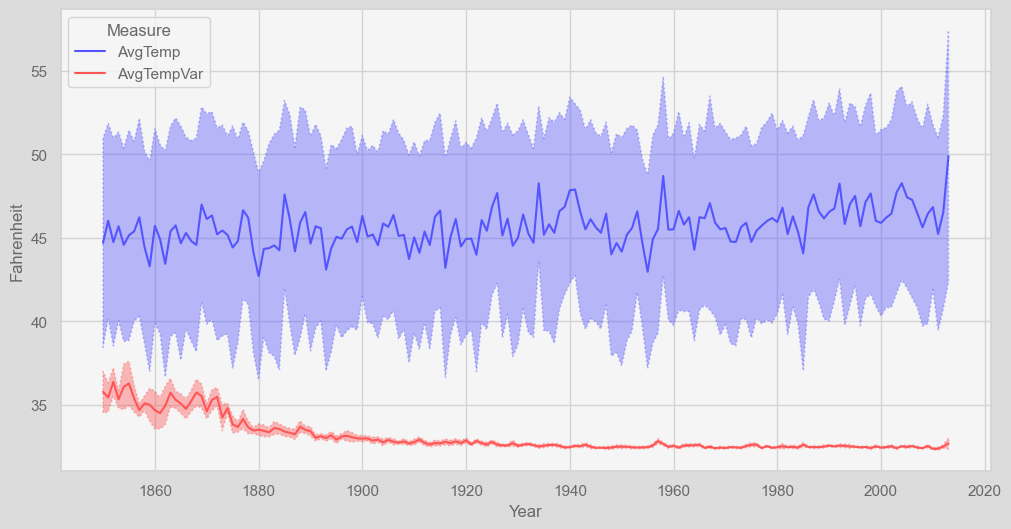

In [16]:
### Simple Lineplot
sns.set_theme()
sns.set(rc=rcPack)
grid = sns.lineplot(data = dfs[dfs['Measure'].isin(['AvgTemp','AvgTempVar'])]
                    , x = 'Year', y ='Fahrenheit', palette = 'seismic', hue = 'Measure', errorbar = ('se',2), err_kws = errPack);